In [ ]:
!pip install scikit-image==0.18.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/29.2 MB 9.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 82.3 MB/s eta 0:00:00
  Created wheel for scikit-image: filename=scikit_image-0.18.3-cp310-cp310-linux_x86_64.whl size=36001532 sha256=e614b67b5ede114544842ff50701e62fb5a244ecc9b66b8803f13624c0d67cfc
  Stored in directory: /root/.cache/pip/wheels/9d/55/80/c5bf730bc10906b1518cd6ebc05c87e69d1c46099ebdc9f59f
Successfully built scikit-image
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.24.0
    Uninstalling scikit-image-0.24.0:
      Successfully uninstalled scikit-image-0.24.0


In [ ]:
import numpy
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage.io import imread
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import numpy as np

In [ ]:
map_base_dir = '/content/drive/MyDrive/DL_Project/'
map_img_dir = '/content/drive/MyDrive/DL_Project/train/images/'

In [ ]:
json_path = os.path.join(map_base_dir, 'annotation.json')
with open(json_path, 'r') as f:
    annot_data = json.load(f)

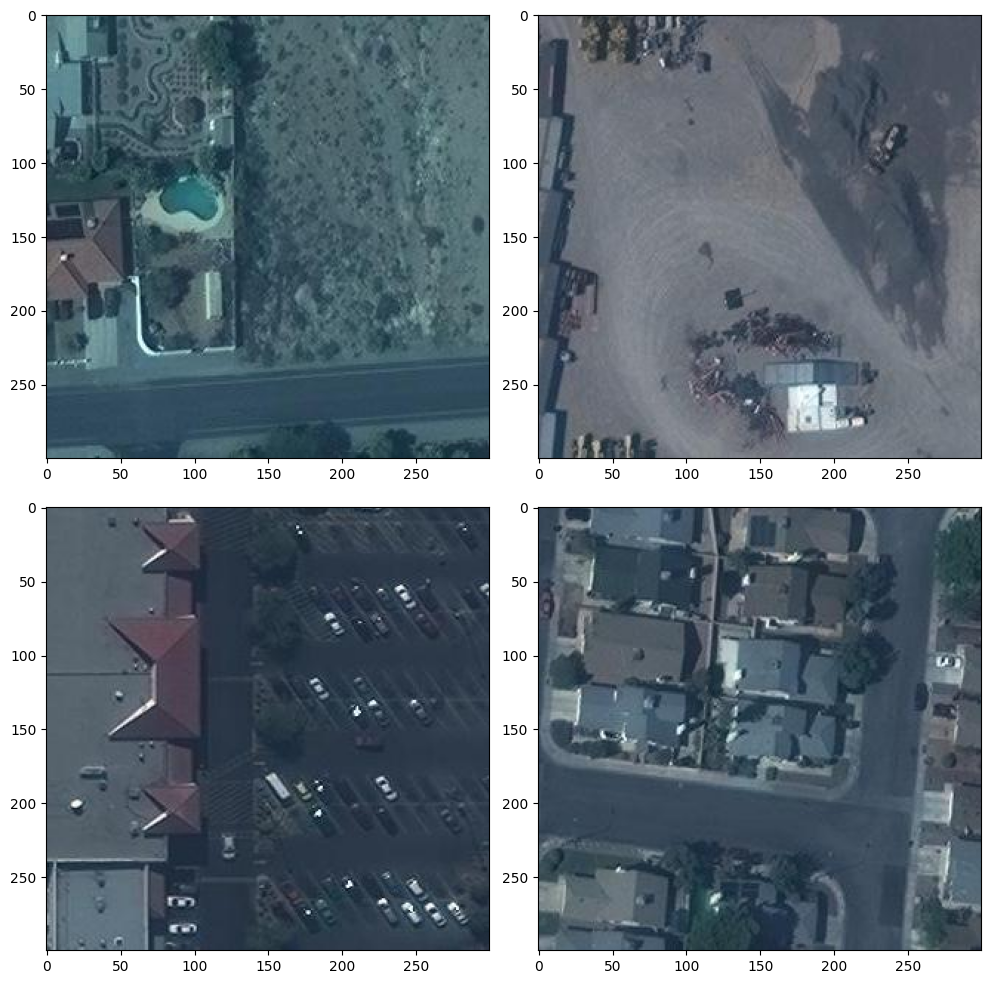

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread

# Sample DataFrame
image_df = pd.DataFrame(annot_data['images'])

# Number of images to display
images_to_display = 4

# Create the subplot
fig, m_axs = plt.subplots(2, 2, figsize=(10, 10))

# Flatten the axes for easy iteration
m_axs = m_axs.flatten()

# Initialize count of displayed images
displayed_images = 0

# Iterate over the sampled images
for _, c_row in image_df.sample(frac=1).iterrows():  # Shuffle and iterate
    if displayed_images >= images_to_display:
        break

    img_path = os.path.join(map_img_dir, c_row['file_name'])

    # Check if image file exists
    if os.path.exists(img_path):
        # Read and display the image
        img_data = imread(img_path)
        m_axs[displayed_images].imshow(img_data)
        displayed_images += 1

# Remove any unused subplots
for i in range(displayed_images, len(m_axs)):
    fig.delaxes(m_axs[i])

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
annot_df = pd.DataFrame(annot_data['annotations'])
annot_df.sample(3)

,id,image_id,segmentation,area,bbox,category_id,iscrowd
355951,36589,4259,"[[118.0, 29.000000000000004, 110.0, 49.0, 110....",10124.0,"[0.0, 0.0, 136.0, 118.0]",100,0
270921,298559,34982,"[[172.0, 286.0, 205.0, 286.0, 205.0, 300.0, 22...",570.0,"[172.0, 164.0, 128.0, 63.0]",100,0
484243,37878,4420,"[[229.0, 273.0, 235.0, 273.0, 234.0, 254.0, 23...",1695.0,"[229.0, 229.0, 65.0, 35.0]",100,0


In [ ]:
full_df = pd.merge(annot_df, image_df, how='left', left_on = 'image_id', right_on='id').dropna()
print(image_df.shape[0], '+', annot_df.shape[0], '->', full_df.shape[0])
full_df.sample(2)

60317 + 515364 -> 515364


,id_x,image_id,segmentation,area,bbox,category_id,iscrowd,id_y,file_name,width,height
418809,83675,9805,"[[125, 0, 125, 2, 132, 2, 132, 15, 149, 15, 14...",2917.0,"[0, 90, 149, 59]",100,0,9805,000000009805.jpg,300,300
226771,335895,39385,"[[0.0, 9.184850993605149e-15, 4.0, 8.939921633...",108.0,"[0.0, 0.0, 4.0, 4.0]",100,0,39385,000000039385.jpg,300,300


In [ ]:
def create_boxes(in_rows):
    box_list = []
    for _, in_row in in_rows.iterrows():
        # bbox from the coco standard
        (start_y, start_x, wid_y, wid_x) = in_row['bbox']

        box_list += [Rectangle((start_x, start_y),
                         wid_y , wid_x
                         )]
    return box_list

<ipython-input-10-51568b5ce681>:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_data = imread(img_path)


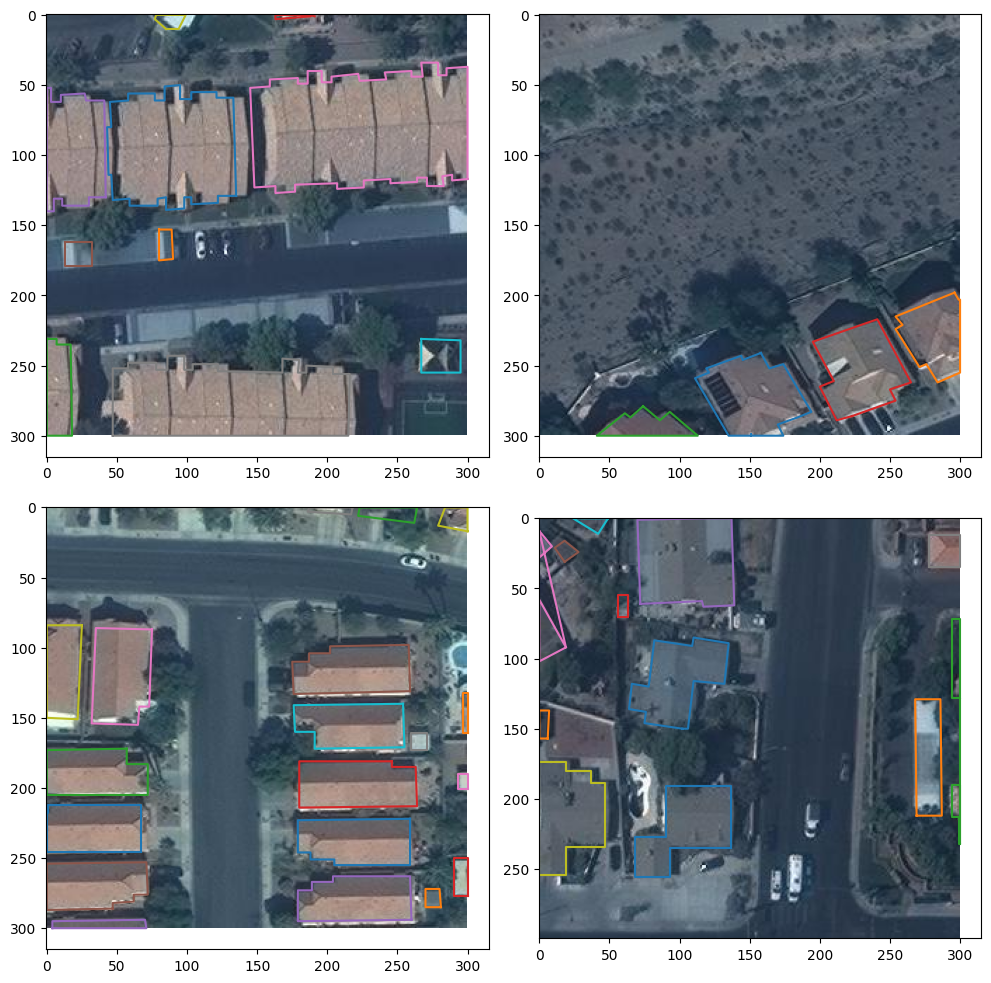

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

# Assuming full_df and map_img_dir are defined
fig, m_axs = plt.subplots(2, 2, figsize=(10, 10))
image_count = 0  # To keep track of how many images have been displayed

# Get unique image_ids from the DataFrame
image_ids = full_df['image_id'].unique()

# Iterate through the image_ids to find images
for c_id in image_ids:
    if image_count >= 4:  # Stop if we've displayed 4 images
        break

    # Get the corresponding DataFrame for the current image_id
    c_df = full_df[full_df['image_id'] == c_id]

    # Get the image file path
    img_path = os.path.join(map_img_dir, c_df['file_name'].values[0])

    # Check if the image file exists
    if os.path.exists(img_path):
        img_data = imread(img_path)
        c_ax = m_axs.flatten()[image_count]  # Select the next subplot
        c_ax.imshow(img_data)

        # Optionally, plot the segmentation
        for _, c_row in c_df.iterrows():
            xy_vec = np.array(c_row['segmentation']).reshape((-1, 2))
            c_ax.plot(xy_vec[:, 0], xy_vec[:, 1], label=c_row['id_x'])

        image_count += 1  # Increment the count of displayed images

# If not enough images were found, hide unused subplots
for remaining_ax in m_axs.flatten()[image_count:]:
    remaining_ax.axis('off')

plt.tight_layout()
plt.show()

Convert Polygons to Segmentations

We can use the `Path` function of matplotlib on a `np.meshgrid` of $x,y$ values in order to convert the polygon into a binary image to use as the segmentation.

In [ ]:
from matplotlib.path import Path
from skimage.color import label2rgb
def rows_to_segmentation(in_img, in_df):
    xx, yy = np.meshgrid(range(in_img.shape[0]),
                range(in_img.shape[1]),
               indexing='ij')
    out_img = np.zeros(in_img.shape[:2])
    for _, c_row in in_df.iterrows():
        xy_vec = np.array(c_row['segmentation']).reshape((-1, 2))
        c_ax.plot(xy_vec[:, 0], xy_vec[:, 1], label = c_df['id_x'])
        xy_path = Path(xy_vec)
        out_img += xy_path.contains_points(np.stack([yy.ravel(),
                                                     xx.ravel()], -1)).reshape(out_img.shape)
    return out_img

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import label2rgb

# Set up the subplots
fig, m_axs = plt.subplots(3, 3, figsize=(15, 20))

# Get unique image IDs to ensure we cover all images regardless of naming
unique_image_ids = full_df['image_id'].unique()

valid_images_count = 0  # Counter for valid images
max_valid_images = 3  # Maximum valid images to display

# Flatten the axes for easier iteration
m_axs_flat = m_axs.flatten()

# Iterate through the unique image IDs
for c_id in unique_image_ids:
    if valid_images_count >= max_valid_images:
        break  # Stop if we've reached the maximum number of valid images

    # Get the DataFrame for the current image ID
    c_df = full_df[full_df['image_id'] == c_id]

    # Attempt to read the image file using the first file_name for the current image ID
    img_path = os.path.join(map_img_dir, c_df['file_name'].values[0])

    if not os.path.exists(img_path):
        continue  # Skip to the next image if the file does not exist

    img_data = imread(img_path)

    # Get the current axes for displaying images
    c_ax = m_axs_flat[valid_images_count * 3]
    d_ax = m_axs_flat[valid_images_count * 3 + 1]
    f_ax = m_axs_flat[valid_images_count * 3 + 2]

    # Display the original image
    c_ax.imshow(img_data)
    c_ax.set_title(f'Original Image: {c_id}')
    c_ax.axis('off')  # Turn off axis labels

    # Get the segmentation output for the current image
    out_img = rows_to_segmentation(img_data, c_df)

    # Create an RGBA image by combining the original and the segmentation overlay
    rgba_img = np.concatenate([img_data,
                                np.clip(np.expand_dims(127 * out_img + 127, -1), 0, 255).astype(np.uint8)
                               ], -1)

    # Display the RGBA image with segmentation overlay
    d_ax.imshow(rgba_img)
    d_ax.set_title(f'Segmentation Overlay: {c_id}')
    d_ax.axis('off')  # Turn off axis labels

    # Display the color-mapped segmentation
    f_ax.imshow(label2rgb(image=img_data, label=out_img, bg_label=0))
    f_ax.set_title(f'Color Mapped Segmentation: {c_id}')
    f_ax.axis('off')  # Turn off axis labels

    valid_images_count += 1  # Increment valid images count

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from sklearn.model_selection import train_test_split
train_ids, valid_ids = train_test_split(image_df['id'], test_size = 0.25)
train_df = full_df[full_df['image_id'].isin(train_ids)]
valid_df = full_df[full_df['image_id'].isin(valid_ids)]
print(train_df.shape[0], 'training boxes')
print(valid_df.shape[0], 'validation boxes')

385853 training boxes
129511 validation boxes


In [ ]:
def batch_img_gen(in_df, batch_size):
       all_groups = list(in_df.groupby('image_id'))
       out_img, out_seg = [], []
       while True:
           np.random.shuffle(all_groups)
           for (_, c_df) in all_groups:
               img_path = os.path.join(map_img_dir, c_df['file_name'].values[0])

               # Check if the file exists
               if not os.path.exists(img_path):
                   continue  # Skip this image and proceed to the next

               img_data = imread(img_path)
               out_img += [img_data]
               out_seg += [np.expand_dims(rows_to_segmentation(img_data, c_df), -1)]
               if len(out_img) >= batch_size:
                   yield (np.stack(out_img, 0)/255.0).astype(np.float32), np.stack(out_seg, 0).astype(np.float32)
                   out_img, out_seg = [], []
           if out_img:
               yield (np.stack(out_img, 0)/255.0).astype(np.float32), np.stack(out_seg, 0).astype(np.float32)
               out_img, out_seg = [], []

# Re-initialize the generator after it is exhausted
valid_gen = batch_img_gen(valid_df, 8)
t_x, t_y = next(valid_gen)

x (8, 300, 300, 3) float32 0.0 1.0
y (8, 300, 300, 1) float32 0.0 1.0


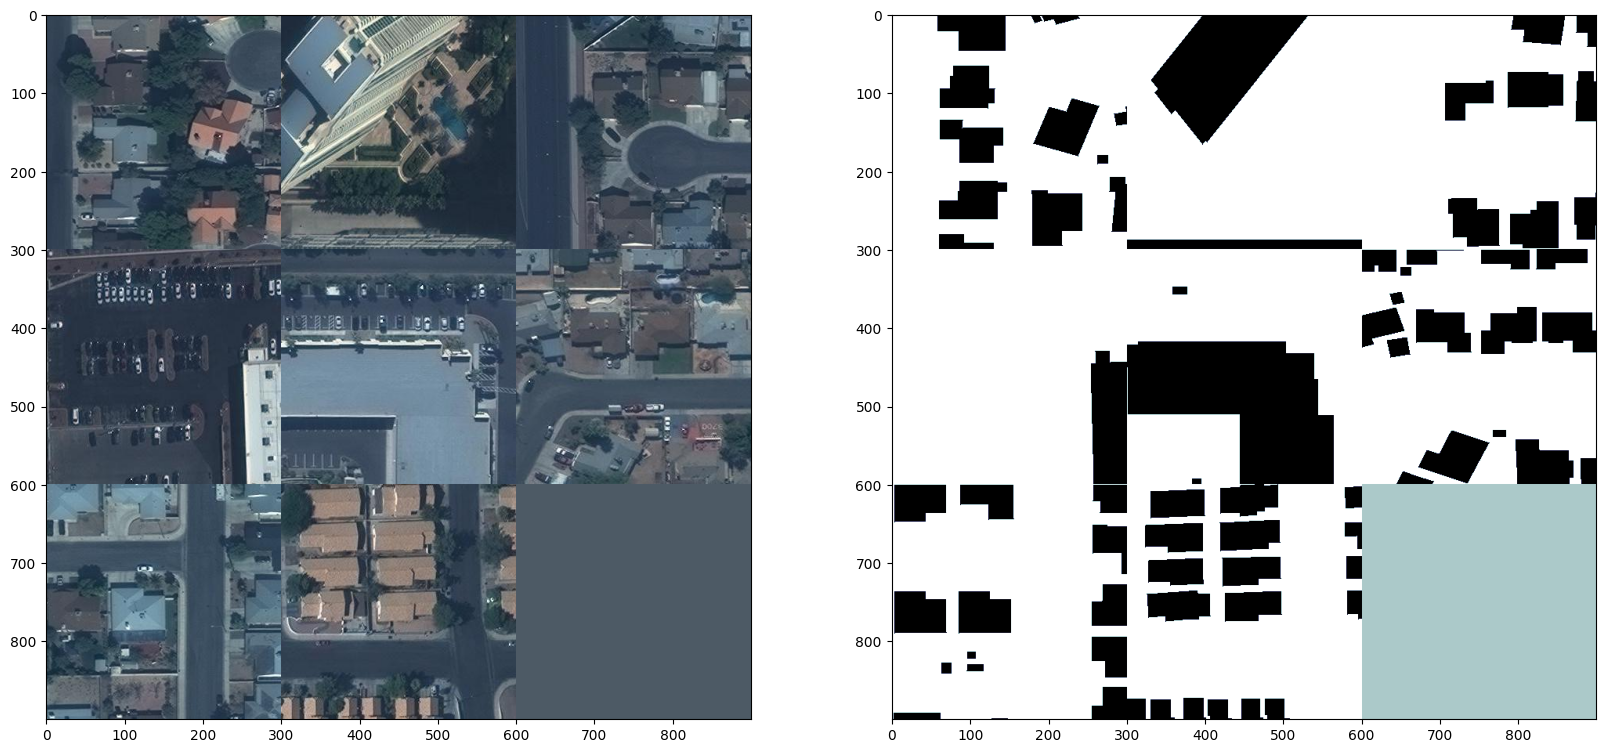

In [ ]:
from skimage.util import montage
t_x, t_y = next(valid_gen)
print('x', t_x.shape, t_x.dtype, t_x.min(), t_x.max())
print('y', t_y.shape, t_y.dtype, t_y.min(), t_y.max())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
montage_rgb = lambda x: np.stack([montage(x[:, :, :, i]) for i in range(x.shape[3])], -1)
ax1.imshow(montage_rgb(t_x))
ax2.imshow(montage(t_y[:, :, :, 0]), cmap='bone_r')

In [ ]:
BLOCK_COUNT = 1
EDGE_CROP = 16
BASE_DEPTH = 16
SPATIAL_DROPOUT = 0.25
GAUSSIAN_NOISE = 0.1
BATCH_SIZE = 24

### **CNN 1**

In [ ]:
from keras import models, layers
def conv_bn(x, filt, dl_rate=(1,1), preblock = False):
    y = layers.Convolution2D(filt, (3, 3),
                             activation='linear',
                             padding='same',
                             dilation_rate=dl_rate,
                            use_bias=False)(x)
    if preblock: return y
    y = layers.BatchNormalization()(y)
    return layers.Activation('elu')(y) # Exponential Linear Unit

in_layer = layers.Input(t_x.shape[1:], name = 'RGB_Input')
pp_in_layer = layers.GaussianNoise(GAUSSIAN_NOISE)(in_layer)
pp_in_layer = layers.BatchNormalization()(pp_in_layer)

c = conv_bn(pp_in_layer, BASE_DEPTH//2)
c = conv_bn(c, BASE_DEPTH//2)
c = conv_bn(c, BASE_DEPTH)

skip_layers = [pp_in_layer]
for j in range(BLOCK_COUNT):
    depth_steps = int(np.log2(t_x.shape[1])-2)
    d = layers.concatenate(skip_layers+[conv_bn(c, BASE_DEPTH*2**j, (2**i, 2**i), preblock=True)
                                        for i in range(depth_steps)])
    d = layers.SpatialDropout2D(SPATIAL_DROPOUT)(d)
    d = layers.BatchNormalization()(d)
    d = layers.Activation('elu')(d)
    # bottleneck
    d = conv_bn(d, BASE_DEPTH*2**(j+1))
    skip_layers += [c]
    c = d
d = layers.Convolution2D(1, (1, 1), activation='sigmoid', padding='same')(d)
d = layers.Cropping2D((EDGE_CROP, EDGE_CROP))(d)
d = layers.ZeroPadding2D((EDGE_CROP, EDGE_CROP))(d)
seg_model = models.Model(inputs = [in_layer],
                    outputs = [d])
seg_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ RGB_Input (InputLayer)    │ (None, 300, 300, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gaussian_noise            │ (None, 300, 300, 3)    │              0 │ RGB_Input[0][0]        │
│ (GaussianNoise)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 300, 300, 3)    │             12 │ gaussian_noise[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 300, 300, 8)    │            216 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 300, 300, 8)    │             32 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 300, 300, 8)    │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 300, 300, 8)    │            576 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 300, 300, 8)    │             32 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 300, 300, 8)    │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 300, 300, 16)   │          1,152 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 300, 300, 16)   │             64 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 300, 300, 16)   │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 300, 300, 16)   │          2,304 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 300, 300, 16)   │          2,304 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 300, 300, 16)   │          2,304 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 300, 300, 16)   │          2,304 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 300, 300, 16)   │          2,304 │ activation_2[0][0]     │
├──────────────────────

 Total params: 44,977 (175.69 KB)

 Trainable params: 44,645 (174.39 KB)

 Non-trainable params: 332 (1.30 KB)

In [ ]:
import tensorflow.keras.backend as K
from keras import models, layers
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)
def dice_p_bce(in_gt, in_pred):
    return 0.05*binary_crossentropy(in_gt, in_pred) - dice_coef(in_gt, in_pred)
def true_positive_rate(y_true, y_pred):
    return K.sum(K.flatten(y_true)*K.flatten(K.round(y_pred)))/K.sum(y_true)
seg_model.compile(optimizer=Adam(1e-4, decay=1e-6), loss=dice_p_bce, metrics=[dice_coef, 'binary_accuracy', true_positive_rate])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

weight_path = '/content/drive/MyDrive/DL_Project/pretrained_weights.weights.h5'

checkpoint = ModelCheckpoint(weight_path, monitor='val_dice_coef', verbose=1,
                             save_best_only=True, mode='max', save_weights_only = True)

# Reduce Learning Rate on Plateau Callback: reduces the learning rate when a metric has stopped improving.
reduceLROnPlat = ReduceLROnPlateau(monitor='val_dice_coef', factor=0.5,
                                   patience=3,
                                   verbose=1, mode='max', epsilon=0.0001, cooldown=2, min_lr=1e-6)

# EarlyStopping: This callback stops training when a monitored metric has stopped improving
early = EarlyStopping(monitor="val_dice_coef",
                      mode="max",
                      patience=15) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [ ]:
valid_gen = batch_img_gen(valid_df, BATCH_SIZE)
loss_history = [seg_model.fit(batch_img_gen(train_df, BATCH_SIZE),
                             steps_per_epoch=min(train_ids.shape[0]//BATCH_SIZE, 100),
                             epochs=10,
                             validation_data=valid_gen,
                             validation_steps=min(train_ids.shape[0]//BATCH_SIZE, 50),
                             callbacks=callbacks_list,
                             verbose=1
                            )]

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 46s/step - binary_accuracy: 0.7268 - dice_coef: 0.4193 - loss: -0.3536 - true_positive_rate: 0.5899 
Epoch 1: val_dice_coef improved from -inf to 0.45624, saving model to /content/drive/MyDrive/DL_Project/pretrained_weights.weights.h5
100/100 ━━━━━━━━━━━━━━━━━━━━ 5241s 52s/step - binary_accuracy: 0.7268 - dice_coef: 0.4196 - loss: -0.3538 - true_positive_rate: 0.5902 - val_binary_accuracy: 0.7086 - val_dice_coef: 0.4562 - val_loss: -0.3885 - val_true_positive_rate: 0.6899 - learning_rate: 1.0000e-04
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 46s/step - binary_accuracy: 0.7316 - dice_coef: 0.4750 - loss: -0.4013 - true_positive_rate: 0.6587 
Epoch 2: val_dice_coef improved from 0.45624 to 0.47503, saving model to /content/drive/MyDrive/DL_Project/pretrained_weights.weights.h5
100/100 ━━━━━━━━━━━━━━━━━━━━ 5222s 52s/step - binary_accuracy: 0.7316 - dice_coef: 0.4751 - loss: -0.4013 - true_positive_rate: 0.6587 - val_binary_accuracy: 0.7559 - val_

In [ ]:
seg_model.load_weights(weight_path)
seg_model.save('/content/drive/MyDrive/DL_Project/full_best_model.h5')

In [ ]:
from skimage.util import montage as montage2d

t_x, t_y = next(valid_gen)
if t_x.shape[0]>4:
    t_x = t_x[:4]
    t_y = t_y[:4]

print('x', t_x.shape, t_x.dtype, t_x.min(), t_x.max())
print('y', t_y.shape, t_y.dtype, t_y.min(), t_y.max())
pred_y = seg_model.predict(t_x)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (24, 8))
montage_rgb = lambda x: np.stack([montage2d(x[:, :, :, i]) for i in range(x.shape[3])], -1)
ax1.imshow(montage_rgb(t_x))
ax2.imshow(montage2d(t_y[:, :, :, 0]), cmap = 'bone_r')
ax2.set_title('Ground Truth')
ax3.imshow(montage2d(pred_y[:, :, :, 0]), cmap = 'bone_r')
ax3.set_title('Prediction')
fig.savefig('pred_fig.png', dpi=300)

### **CNN 2**

In [ ]:
from keras import models, layers

# Convolution + BatchNormalization + ELU Block
def conv_bn(x, filters, kernel_size=(3, 3), dilation_rate=(1, 1), preblock=False):
    y = layers.Conv2D(filters, kernel_size, activation='linear', padding='same',
                      dilation_rate=dilation_rate, use_bias=False)(x)
    if preblock: return y
    y = layers.BatchNormalization()(y)
    return layers.Activation('elu')(y)  # ELU activation for non-linearity

# Encoder Block: Convolution + MaxPooling
def encoder_block(x, filters, pool_size=(2, 2)):
    c = conv_bn(x, filters)
    c = conv_bn(c, filters)
    p = layers.MaxPooling2D(pool_size)(c)  # Downsample
    return c, p

# Decoder Block: Transposed Convolution (Upsampling) + Concatenation + Convolution
def decoder_block(x, skip_connection, filters):
    u = layers.Conv2DTranspose(filters, (2, 2), strides=(2, 2), padding='same')(x)  # Upsample

    # Calculate the difference in height and width
    height_diff = skip_connection.shape[1] - u.shape[1]
    width_diff = skip_connection.shape[2] - u.shape[2]

    # Calculate the cropping values for each dimension
    crop_height = (height_diff // 2, height_diff - height_diff // 2)
    crop_width = (width_diff // 2, width_diff - width_diff // 2)

    # Crop the skip connection to match the shape of the upsampled tensor
    skip_connection_cropped = layers.Cropping2D(cropping=(crop_height, crop_width))(skip_connection)

    u = layers.concatenate([u, skip_connection_cropped])  # Skip connection
    u = conv_bn(u, filters)
    u = conv_bn(u, filters)
    return u

# Input layer
in_layer = layers.Input(t_x.shape[1:], name='RGB_Input')

# Noise and normalization on the input
pp_in_layer = layers.GaussianNoise(GAUSSIAN_NOISE)(in_layer)
pp_in_layer = layers.BatchNormalization()(pp_in_layer)

# Encoder: Downsampling path
c1, p1 = encoder_block(pp_in_layer, BASE_DEPTH)  # Block 1
c2, p2 = encoder_block(p1, BASE_DEPTH * 2)       # Block 2
c3, p3 = encoder_block(p2, BASE_DEPTH * 4)       # Block 3
c4, p4 = encoder_block(p3, BASE_DEPTH * 8)       # Block 4

# Bottleneck
b = conv_bn(p4, BASE_DEPTH * 16)  # Base depth increased to capture global context
b = conv_bn(b, BASE_DEPTH * 16)

# Decoder: Upsampling path
u4 = decoder_block(b, c4, BASE_DEPTH * 8)  # Block 4
u3 = decoder_block(u4, c3, BASE_DEPTH * 4) # Block 3
u2 = decoder_block(u3, c2, BASE_DEPTH * 2) # Block 2
u1 = decoder_block(u2, c1, BASE_DEPTH)     # Block 1

# Output layer (1 channel for binary segmentation)
output_layer = layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(u1)
output_layer = layers.ZeroPadding2D(padding=(6, 6))(output_layer)  # Pad to (300, 300)

# Compile the model
seg_model2 = models.Model(inputs=in_layer, outputs=output_layer)
seg_model2.summary()

In [ ]:
import tensorflow.keras.backend as K
from keras import models, layers
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)
def dice_p_bce(in_gt, in_pred):
    return 0.05*binary_crossentropy(in_gt, in_pred) - dice_coef(in_gt, in_pred)
def true_positive_rate(y_true, y_pred):
    return K.sum(K.flatten(y_true)*K.flatten(K.round(y_pred)))/K.sum(y_true)
seg_model2.compile(optimizer=Adam(1e-4, decay=1e-6), loss=dice_p_bce, metrics=[dice_coef, 'binary_accuracy', true_positive_rate])

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

weight_path = '/content/drive/MyDrive/DL_Project/pretrained_weights.weights.h5'

checkpoint = ModelCheckpoint(weight_path, monitor='val_dice_coef', verbose=1,
                             save_best_only=True, mode='max', save_weights_only = True)

# Reduce Learning Rate on Plateau Callback: reduces the learning rate when a metric has stopped improving.
reduceLROnPlat = ReduceLROnPlateau(monitor='val_dice_coef', factor=0.5,
                                   patience=3,
                                   verbose=1, mode='max', epsilon=0.0001, cooldown=2, min_lr=1e-6)

# EarlyStopping: This callback stops training when a monitored metric has stopped improving
early = EarlyStopping(monitor="val_dice_coef",
                      mode="max",
                      patience=15) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [ ]:
valid_gen2 = batch_img_gen(valid_df, BATCH_SIZE)
loss_history = [seg_model2.fit(batch_img_gen(train_df, BATCH_SIZE),
                             steps_per_epoch=min(train_ids.shape[0]//BATCH_SIZE, 100),
                             epochs=7,
                             validation_data=valid_gen2,
                             validation_steps=min(train_ids.shape[0]//BATCH_SIZE, 50),
                             callbacks=callbacks_list,
                             verbose=1
                            )]

In [ ]:
seg_model2.load_weights(weight_path)
seg_model2.save('/content/drive/MyDrive/DL_Project/full_best_model2.h5')

In [ ]:
from skimage.util import montage as montage2d

t_x, t_y = next(valid_gen2)
if t_x.shape[0]>4:
    t_x = t_x[:4]
    t_y = t_y[:4]

print('x', t_x.shape, t_x.dtype, t_x.min(), t_x.max())
print('y', t_y.shape, t_y.dtype, t_y.min(), t_y.max())
pred_y = seg_model2.predict(t_x)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (24, 8))
montage_rgb = lambda x: np.stack([montage2d(x[:, :, :, i]) for i in range(x.shape[3])], -1)
ax1.imshow(montage_rgb(t_x))
ax2.imshow(montage2d(t_y[:, :, :, 0]), cmap = 'bone_r')
ax2.set_title('Ground Truth')
ax3.imshow(montage2d(pred_y[:, :, :, 0]), cmap = 'bone_r')
ax3.set_title('Prediction')
fig.savefig('pred_fig.png', dpi=300)

### **Area calculation**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import montage as montage2d

# Function to calculate rooftop area from segmentation mask
def calculate_rooftop_area(segmentation_mask, pixel_resolution):
    """
    Calculate the area of the segmented rooftops.
    Parameters:
        - segmentation_mask: 2D binary array (same size as the image) where 1 represents the building, 0 represents the background.
        - pixel_resolution: The spatial resolution of the image, i.e., how many meters each pixel represents.
    Returns:
        - The area of the rooftop in square meters.
    """
    building_pixels = np.sum(segmentation_mask)
    rooftop_area = building_pixels * (pixel_resolution ** 2)
    return rooftop_area

CNN1

In [ ]:
# valid_gen is the generator and seg_model is the trained segmentation model
t_x, t_y = next(valid_gen)
if t_x.shape[0] > 3:  # Limit to 3 images
    t_x = t_x[:3]
    t_y = t_y[:3]

# Make predictions
pred_y = seg_model.predict(t_x)

# Define the pixel resolution (example: 0.5 meters per pixel)
pixel_resolution = 0.5  # Adjust this according to your dataset's spatial resolution

# Loop over each image
for i in range(t_x.shape[0]):
    # Create a new figure for each image
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

    # Display RGB input image
    ax1.imshow(t_x[i])
    ax1.set_title('RGB Input')

    # Display ground truth segmentation
    ax2.imshow(t_y[i, :, :, 0], cmap='bone_r')
    ax2.set_title('Ground Truth')

    # Display predicted segmentation
    ax3.imshow(pred_y[i, :, :, 0], cmap='bone_r')
    ax3.set_title('Prediction')

    # Calculate rooftop area for ground truth and prediction
    gt_area = calculate_rooftop_area(t_y[i, :, :, 0], pixel_resolution)
    pred_area = calculate_rooftop_area(pred_y[i, :, :, 0], pixel_resolution)

    # Add the area as text at the bottom of each subplot
    ax2.text(0.5, -0.1, f'Area: {gt_area:.2f} m²', ha='center', va='center', transform=ax2.transAxes,
             fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.5'))
    ax3.text(0.5, -0.1, f'Area: {pred_area:.2f} m²', ha='center', va='center', transform=ax3.transAxes,
             fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.5'))

    # Adjust layout to ensure the text fits inside the plot
    plt.tight_layout()

    # Save the figure for each image
    fig.savefig(f'pred_fig_{i}.png', dpi=300)

    # Show the plot for each image
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

CNN2

In [ ]:
# valid_gen2 is the generator and seg_model2 is the trained segmentation model
t_x, t_y = next(valid_gen2)
if t_x.shape[0] > 3:  # Limit to 3 images
    t_x = t_x[:3]
    t_y = t_y[:3]

# Make predictions
pred_y = seg_model2.predict(t_x)

# Define the pixel resolution (example: 0.5 meters per pixel)
pixel_resolution = 0.5  # Adjust this according to your dataset's spatial resolution

# Loop over each image
for i in range(t_x.shape[0]):
    # Create a new figure for each image
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

    # Display RGB input image
    ax1.imshow(t_x[i])
    ax1.set_title('RGB Input')

    # Display ground truth segmentation
    ax2.imshow(t_y[i, :, :, 0], cmap='bone_r')
    ax2.set_title('Ground Truth')

    # Display predicted segmentation
    ax3.imshow(pred_y[i, :, :, 0], cmap='bone_r')
    ax3.set_title('Prediction')

    # Calculate rooftop area for ground truth and prediction
    gt_area = calculate_rooftop_area(t_y[i, :, :, 0], pixel_resolution)
    pred_area = calculate_rooftop_area(pred_y[i, :, :, 0], pixel_resolution)

    # Add the area as text at the bottom of each subplot
    ax2.text(0.5, -0.1, f'Area: {gt_area:.2f} m²', ha='center', va='center', transform=ax2.transAxes,
             fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.5'))
    ax3.text(0.5, -0.1, f'Area: {pred_area:.2f} m²', ha='center', va='center', transform=ax3.transAxes,
             fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.5'))

    # Adjust layout to ensure the text fits inside the plot
    plt.tight_layout()

    # Save the figure for each image
    fig.savefig(f'pred_fig_{i}.png', dpi=300)

    # Show the plot for each image
    plt.show()

**External Images**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import montage as montage2d
from keras.preprocessing.image import load_img, img_to_array
from skimage.io import imread

# Path to your training images
train_folder = '/content/drive/MyDrive/DL_Project/test'

# List of images (train1.png, train2.png, ..., train5.png)
image_filenames = [f'train{i}.png' for i in range(1, 6)]

# Function to calculate rooftop area from segmentation mask
def calculate_rooftop_area(segmentation_mask, pixel_resolution):
    """
    Calculate the area of the segmented rooftops.
    Parameters:
        - segmentation_mask: 2D binary array where 1 represents the building, 0 represents the background.
        - pixel_resolution: The spatial resolution of the image, i.e., how many meters each pixel represents.
    Returns:
        - The area of the rooftop in square meters.
    """
    building_pixels = np.sum(segmentation_mask)
    rooftop_area = building_pixels * (pixel_resolution ** 2)
    return rooftop_area

# Define pixel resolution for each image (in meters per pixel)
# Example values; these should be specific to each image
pixel_resolutions = {
    'train1.png': 0.5,  # 0.5 meters per pixel for train1.png
    'train2.png': 0.25, # 0.25 meters per pixel for train2.png (higher zoom level)
    'train3.png': 0.5,
    'train4.png': 0.5,
    'train5.png': 0.25,
}

CNN1

In [ ]:
# Loop through each image in the train folder
for img_name in image_filenames:
    img_path = os.path.join(train_folder, img_name)

    # Load the image and convert to an array
    img = load_img(img_path)  # Load image using Keras function
    img_array = img_to_array(img) / 255.0  # Normalize to [0, 1] range

    # Reshape to match the model input if necessary (e.g., add batch dimension)
    img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, H, W, 3)

    # Predict the segmentation mask
    pred_y = seg_model.predict(img_array)

    # Get the pixel resolution for the current image
    pixel_resolution = pixel_resolutions.get(img_name, 0.5)  # Default to 0.5 meters if not provided

    # Calculate rooftop area for the predicted mask
    pred_area = calculate_rooftop_area(pred_y[0, :, :, 0], pixel_resolution)

    # Display the image and predicted segmentation mask
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    # Display RGB input image
    ax1.imshow(img_array[0])
    ax1.set_title(f'RGB Input - {img_name}')

    # Display predicted segmentation mask
    ax2.imshow(pred_y[0, :, :, 0], cmap='bone_r')
    ax2.set_title('Prediction')

    # Add the predicted rooftop area as text below the predicted mask
    ax2.text(0.5, -0.1, f'Predicted Rooftop Area: {pred_area:.2f} m²', ha='center', va='center',
             transform=ax2.transAxes, fontsize=12, color='white',
             bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.5'))

    # Adjust layout to fit everything in the plot
    plt.tight_layout()

    # Save the figure for each image
    fig.savefig(f'pred_fig_{img_name}', dpi=300)

    # Show the plot
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

CNN2

In [ ]:
# Loop through each image in the train folder
for img_name in image_filenames:
    img_path = os.path.join(train_folder, img_name)

    # Load the image and convert to an array
    img = load_img(img_path)  # Load image using Keras function
    img_array = img_to_array(img) / 255.0  # Normalize to [0, 1] range

    # Reshape to match the model input if necessary (e.g., add batch dimension)
    img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, H, W, 3)

    # Predict the segmentation mask
    pred_y = seg_model.predict(img_array)

    # Get the pixel resolution for the current image
    pixel_resolution = pixel_resolutions.get(img_name, 0.5)  # Default to 0.5 meters if not provided

    # Calculate rooftop area for the predicted mask
    pred_area = calculate_rooftop_area(pred_y[0, :, :, 0], pixel_resolution)

    # Display the image and predicted segmentation mask
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    # Display RGB input image
    ax1.imshow(img_array[0])
    ax1.set_title(f'RGB Input - {img_name}')

    # Display predicted segmentation mask
    ax2.imshow(pred_y[0, :, :, 0], cmap='bone_r')
    ax2.set_title('Prediction')

    # Add the predicted rooftop area as text below the predicted mask
    ax2.text(0.5, -0.1, f'Predicted Rooftop Area: {pred_area:.2f} m²', ha='center', va='center',
             transform=ax2.transAxes, fontsize=12, color='white',
             bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.5'))

    # Adjust layout to fit everything in the plot
    plt.tight_layout()

    # Save the figure for each image
    fig.savefig(f'pred_fig_{img_name}', dpi=300)

    # Show the plot
    plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from PIL import Image

# Path to your training images
train_folder = '/content/drive/MyDrive/DL_Project/test'

# List of images (train1.png, train2.png, ..., train5.png)
image_filenames = [f'train{i}.png' for i in range(1, 6)]

# Function to calculate rooftop area using the formula
def calculate_rooftop_area(segmentation_mask, total_study_area):
    """
    Calculate the area of the segmented rooftops using the formula:
    Roof Area = (Roof Pixels / Total Pixels) * Total Study Area
    Parameters:
        - segmentation_mask: 2D binary array where 1 represents the building, 0 represents the background.
        - total_study_area: The real-world area covered by the entire image (in square meters).
    Returns:
        - The area of the rooftop in square meters.
    """
    building_pixels = np.sum(segmentation_mask)  # Number of roof pixels
    total_pixels = segmentation_mask.shape[0] * segmentation_mask.shape[1]  # Total number of pixels in the image
    rooftop_area = (building_pixels / total_pixels) * total_study_area  # Applying the formula
    return rooftop_area

# Function to get image resolution from metadata or assume a default value
def get_image_resolution(image_path):
    """
    Retrieve the resolution (pixel size in meters) from image metadata or a default value.
    Returns the resolution (meters per pixel).
    """
    # Load image using PIL to get metadata
    img = Image.open(image_path)

    # Placeholder for real resolution (adjust this based on your satellite image data)
    resolution = 0.5  # Default resolution in meters per pixel (adjust this based on metadata)

    return resolution

# Loop through each image in the train folder
for img_name in image_filenames:
    img_path = os.path.join(train_folder, img_name)

    # Get the image resolution
    resolution = get_image_resolution(img_path)

    # Load the image and convert it to an array (as model input)
    img_array = img_to_array(load_img(img_path)) / 255.0

    # Reshape to match the model input if necessary (e.g., add batch dimension)
    img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, H, W, 3)

    # Predict the segmentation mask using the trained model
    pred_y = seg_model.predict(img_array)

    # Calculate the total study area (real-world area covered by the image)
    img_height, img_width = img_array.shape[1:3]
    total_study_area = (img_height * resolution) * (img_width * resolution)  # Total area in square meters

    # Calculate rooftop area for the predicted mask
    pred_area = calculate_rooftop_area(pred_y[0, :, :, 0], total_study_area)

    # Display the image and predicted segmentation mask
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    # Display RGB input image
    ax1.imshow(img_array[0])
    ax1.set_title(f'RGB Input - {img_name}')

    # Display predicted segmentation mask
    ax2.imshow(pred_y[0, :, :, 0], cmap='bone_r')
    ax2.set_title('Prediction')

    # Add the predicted rooftop area as text below the predicted mask
    ax2.text(0.5, -0.1, f'Predicted Rooftop Area: {pred_area:.2f} m²', ha='center', va='center',
             transform=ax2.transAxes, fontsize=12, color='white',
             bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.5'))

    # Adjust layout to fit everything in the plot
    plt.tight_layout()

    # Save the figure for each image
    fig.savefig(f'pred_fig_{img_name}', dpi=300)

    # Show the plot
    plt.show()

Output hidden; open in https://colab.research.google.com to view.